# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [20]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [11]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)


In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
log_reg = LogisticRegression()

In [14]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
log_reg.score(X_test_scaled, y_test)

0.95882

In [16]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228015
         1.0       0.89      0.60      0.72     21985

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [17]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [18]:
train["fraud"] = y_train.values

In [19]:
survived = train[train["fraud"] == 1]
no_survived = train[train["fraud"] == 0]

In [20]:
yes_diabetes_oversampled = resample(survived, 
                                    replace=True, 
                                    n_samples = len(no_survived),
                                    random_state=0)

In [21]:
train_over = pd.concat([yes_diabetes_oversampled, no_survived])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30491,2.191251,2.143432,0.681827,0.367402,-0.734410,-0.33497,0.733673,1.0
499589,-0.359401,-0.214605,2.704102,0.367402,-0.734410,-0.33497,0.733673,1.0
488640,3.618406,-0.208697,5.897568,0.367402,-0.734410,-0.33497,-1.363006,1.0
600199,-0.388526,-0.133452,2.088905,-2.721812,-0.734410,-0.33497,-1.363006,1.0
525805,0.198024,-0.204752,2.083048,0.367402,-0.734410,-0.33497,0.733673,1.0
...,...,...,...,...,...,...,...,...
749995,0.114207,-0.093938,-0.209958,0.367402,1.361637,-0.33497,0.733673,0.0
749996,-0.335567,-0.143903,0.608822,0.367402,1.361637,-0.33497,0.733673,0.0
749997,-0.363415,1.180575,-0.415328,0.367402,-0.734410,-0.33497,-1.363006,0.0
749998,-0.239030,0.323518,-0.112612,0.367402,1.361637,-0.33497,-1.363006,0.0


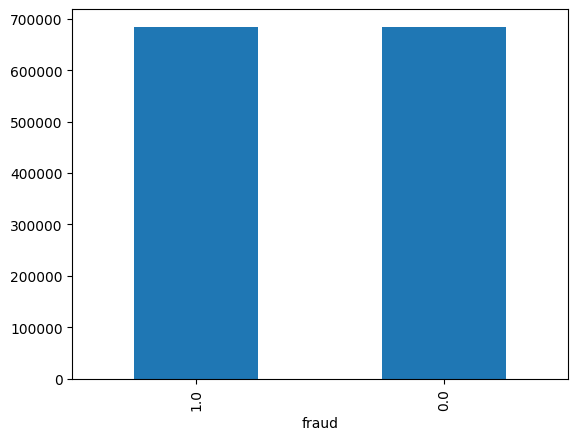

In [22]:
survived_plt = train_over["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [23]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [25]:
X_test_scaled


array([[-0.12470542, -0.21678176, -0.59345043, ..., -0.73441018,
        -0.33497043,  0.73367252],
       [-0.33750718,  0.23940497, -0.56613688, ..., -0.73441018,
        -0.33497043, -1.36300593],
       [ 0.93768876, -0.12419243, -0.49044554, ..., -0.73441018,
         2.98533811,  0.73367252],
       ...,
       [-0.36128343,  0.28484177, -0.55162689, ...,  1.3616369 ,
        -0.33497043,  0.73367252],
       [-0.33498205, -0.14117201, -0.47609875, ..., -0.73441018,
        -0.33497043,  0.73367252],
       [ 0.33799546, -0.1579006 ,  1.19768698, ...,  1.3616369 ,
        -0.33497043,  0.73367252]])

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228015
         1.0       0.57      0.95      0.72     21985

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
pip install imblearn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/238.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Javi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [33]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [34]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [35]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228015
         1.0       0.57      0.95      0.72     21985

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

